In [1]:
#Task 3 / Course 5
#Credit One Classiciation
#Final Modeling and Results

from sklearn import datasets
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns 

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import sklearn.svm as svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

#RFE
from sklearn.feature_selection import RFE

In [2]:
ccBASE = pd.read_csv('default of credit card clients.csv')
ccBASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL     30000 non-null int64
SEX           30000 non-null int64
EDUCATION     30000 non-null int64
MARRIAGE      30000 non-null int64
AGE           30000 non-null int64
PAST_PAY_1    30000 non-null int64
PAST_PAY_2    30000 non-null int64
PAST_PAY_3    30000 non-null int64
PAST_PAY_4    30000 non-null int64
PAST_PAY_5    30000 non-null int64
PAST_PAY_6    30000 non-null int64
BILL_AMT1     30000 non-null int64
BILL_AMT2     30000 non-null int64
BILL_AMT3     30000 non-null int64
BILL_AMT4     30000 non-null int64
BILL_AMT5     30000 non-null int64
BILL_AMT6     30000 non-null int64
PAY_AMT1      30000 non-null int64
PAY_AMT2      30000 non-null int64
PAY_AMT3      30000 non-null int64
PAY_AMT4      30000 non-null int64
PAY_AMT5      30000 non-null int64
PAY_AMT6      30000 non-null int64
DEFAULTED     30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [4]:
#import base data
cc = pd.read_csv('OrdinalValuesDefaultCC.csv', header = 0)
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL        30000 non-null int64
SEX              30000 non-null int64
EDUCATION        30000 non-null int64
MARRIAGE         30000 non-null int64
AGE              30000 non-null int64
SEPT_STATUS      30000 non-null int64
AUGUST_STATUS    30000 non-null int64
JULY_STATUS      30000 non-null int64
JUNE_STATUS      30000 non-null int64
MAY_STATUS       30000 non-null int64
APRILL_STATUS    30000 non-null int64
SEPT_BILL        30000 non-null int64
AUGUST_BILL      30000 non-null int64
JULY_BILL        30000 non-null int64
JUNE_BILL        30000 non-null int64
MAY_BILL         30000 non-null int64
APRIL_BILL       30000 non-null int64
SEPT_PAID        30000 non-null int64
AUGUST_PAID      30000 non-null int64
JULY_PAID        30000 non-null int64
JUNE_PAID        30000 non-null int64
MAY_PAID         30000 non-null int64
APRIL_PAID       30000 non-null int64
DEFAULTED        

In [10]:
#Import high default probability data set
#Males, under 40, under 100k credit limit, High School 

ccHIDEF = pd.read_csv('maels40100khs.csv', header = 0)
ccHIDEF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 24 columns):
LIMIT_BAL        575 non-null int64
SEX              575 non-null int64
EDUCATION        575 non-null int64
MARRIAGE         575 non-null int64
AGE              575 non-null int64
SEPT_STATUS      575 non-null int64
AUGUST_STATUS    575 non-null int64
JULY_STATUS      575 non-null int64
JUNE_STATUS      575 non-null int64
MAY_STATUS       575 non-null int64
APRILL_STATUS    575 non-null int64
SEPT_BILL        575 non-null int64
AUGUST_BILL      575 non-null int64
JULY_BILL        575 non-null int64
JUNE_BILL        575 non-null int64
MAY_BILL         575 non-null int64
APRIL_BILL       575 non-null int64
SEPT_PAID        575 non-null int64
AUGUST_PAID      575 non-null int64
JULY_PAID        575 non-null int64
JUNE_PAID        575 non-null int64
MAY_PAID         575 non-null int64
APRIL_PAID       575 non-null int64
DEFAULTED        575 non-null int64
dtypes: int64(24)
memory usage:

In [2]:
#Import Male, HS, <100k

ccHIDEF1 = pd.read_csv('MaleHS100k.csv', header = 0)
ccHIDEF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 24 columns):
LIMIT_BAL        1202 non-null int64
SEX              1202 non-null int64
EDUCATION        1202 non-null int64
MARRIAGE         1202 non-null int64
AGE              1202 non-null int64
SEPT_STATUS      1202 non-null int64
AUGUST_STATUS    1202 non-null int64
JULY_STATUS      1202 non-null int64
JUNE_STATUS      1202 non-null int64
MAY_STATUS       1202 non-null int64
APRILL_STATUS    1202 non-null int64
SEPT_BILL        1202 non-null int64
AUGUST_BILL      1202 non-null int64
JULY_BILL        1202 non-null int64
JUNE_BILL        1202 non-null int64
MAY_BILL         1202 non-null int64
APRIL_BILL       1202 non-null int64
SEPT_PAID        1202 non-null int64
AUGUST_PAID      1202 non-null int64
JULY_PAID        1202 non-null int64
JUNE_PAID        1202 non-null int64
MAY_PAID         1202 non-null int64
APRIL_PAID       1202 non-null int64
DEFAULTED        1202 non-null int64
dtype

In [22]:
#import feamale, >300k, >University, Married Data Set
ccLOWDEF = pd.read_csv('female300kunivmarried.csv', header = 0)
ccLOWDEF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 24 columns):
LIMIT_BAL        1343 non-null int64
SEX              1343 non-null int64
EDUCATION        1343 non-null int64
MARRIAGE         1343 non-null int64
AGE              1343 non-null int64
SEPT_STATUS      1343 non-null int64
AUGUST_STATUS    1343 non-null int64
JULY_STATUS      1343 non-null int64
JUNE_STATUS      1343 non-null int64
MAY_STATUS       1343 non-null int64
APRILL_STATUS    1343 non-null int64
SEPT_BILL        1343 non-null int64
AUGUST_BILL      1343 non-null int64
JULY_BILL        1343 non-null int64
JUNE_BILL        1343 non-null int64
MAY_BILL         1343 non-null int64
APRIL_BILL       1343 non-null int64
SEPT_PAID        1343 non-null int64
AUGUST_PAID      1343 non-null int64
JULY_PAID        1343 non-null int64
JUNE_PAID        1343 non-null int64
MAY_PAID         1343 non-null int64
APRIL_PAID       1343 non-null int64
DEFAULTED        1343 non-null int64
dtype

In [ ]:
#Import cc Covariance data, with BILL columns removed
ccCOVnoBILL = pd.read_csv('ccCOVnoBILL.csv', header = 0)
ccCOVnoBILL.info()

In [ ]:
cc.head()

In [ ]:
#Import RFE cc data
ccRFE = pd.read_csv('RFEordinalccFINAL.csv', header = 0)
ccRFE.info()

In [ ]:
#Import CORR (correlation) data set
ccCORR = pd.read_csv('CORRordinalccFINAL.csv', header = 0)
ccCORR.info()

In [ ]:
#Import no ASME (age, sex, education, marriage all removed) data set
ccCConly = pd.read_csv('noASMccDataSet.csv', header = 0)
ccCConly.info()

In [ ]:
#Import No Bill or Monthly Payment data set
ccNoBillPymt = pd.read_csv('NoBillPymtCCdata.csv', header = 0)
ccNoBillPymt.info()

In [ ]:
#Import Age, Sex, Marriage, Education only data set

ccASMEonly = pd.read_csv('ccASMEonly.csv', header = 0)
ccASMEonly.info()

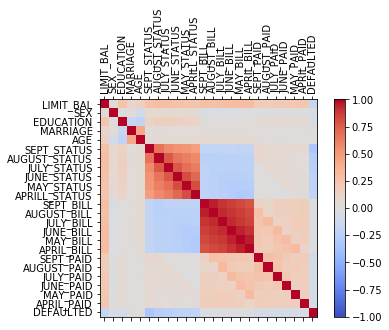

In [82]:
#Visulaize and remove high coreelated features

corrMatNUM = cc.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corrMatNUM,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corrMatNUM.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corrMatNUM.columns)
ax.set_yticklabels(corrMatNUM.columns)
plt.show()


In [ ]:
#COVARIANCE 

covMat = cc.cov()
print(covMat)

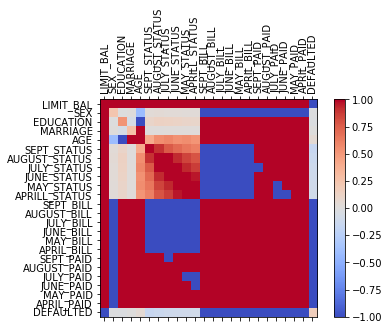

In [83]:
#Visulaize and remove high covariance features

covMatNUM = cc.cov()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(covMatNUM,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(covMatNUM.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(covMatNUM.columns)
ax.set_yticklabels(covMatNUM.columns)
plt.show()

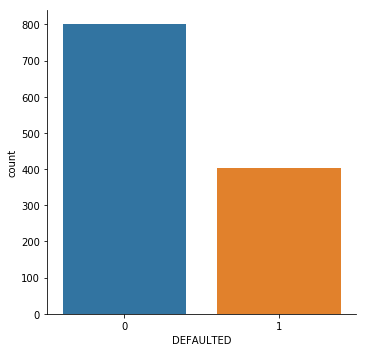

In [89]:
#Factor plot of those who defaulted and those who did not default

sns.catplot('DEFAULTED', data = ccHIDEF1, kind = 'count')

c:\users\riley barrow\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Customers Ages')

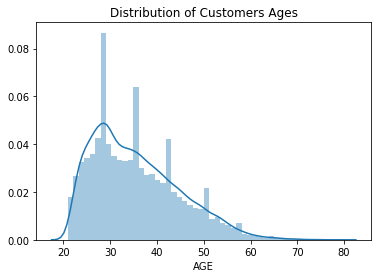

In [91]:
#Distribution of age, with an overlay of a density plot
age = cc['AGE'].dropna()
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers Ages")

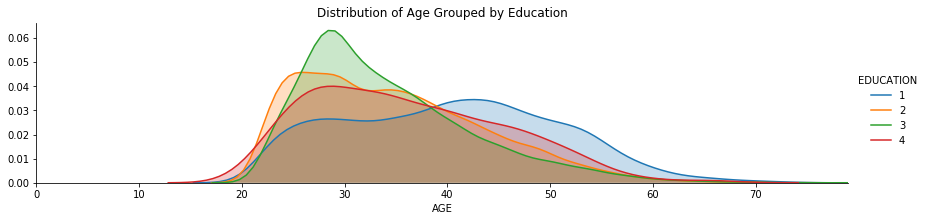

In [92]:
#kde plot, Distibution of Passenger Education

fig1 = sns.FacetGrid(cc, hue = 'EDUCATION', aspect = 4)
fig1.map(sns.kdeplot, 'AGE', shade = True)
oldest1 = cc['AGE'].max()
fig1.set(xlim=(0, oldest1))
fig1.set(title='Distribution of Age Grouped by Education')
fig1.add_legend()

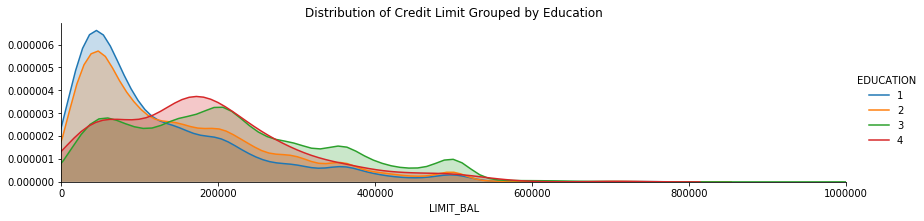

In [93]:
#kdeplot, Distribution of Credit Limit by Education 

fig2 = sns.FacetGrid(cc, hue = 'EDUCATION', aspect = 4)
fig2.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest2 = cc['LIMIT_BAL'].max()
fig2.set(xlim=(0, oldest2))
fig2.set(title='Distribution of Credit Limit Grouped by Education')
fig2.add_legend()

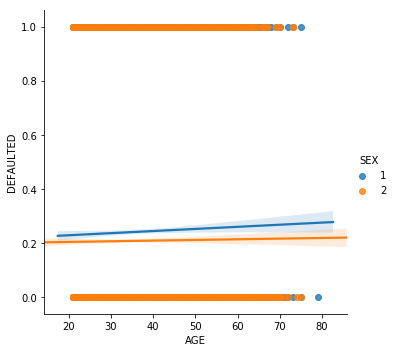

In [94]:
#linear plot of age vs Defaulted

sns.lmplot('AGE', 'DEFAULTED', data=cc, hue = 'SEX')

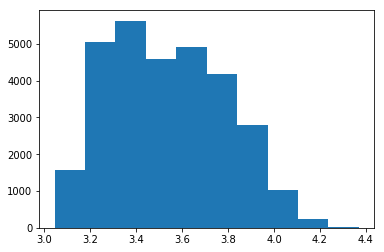

In [95]:
#Guassian curve manufactured for Age 

# histogram plot of a low res sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from numpy import exp
from scipy.stats import boxcox
# seed the random number generator
seed(1)

#define data
data1 = cc.AGE
#power transform
data = boxcox(data1, 0)

#transform to be expoential 
#data = exp(data1)

pyplot.hist(data)
pyplot.show()

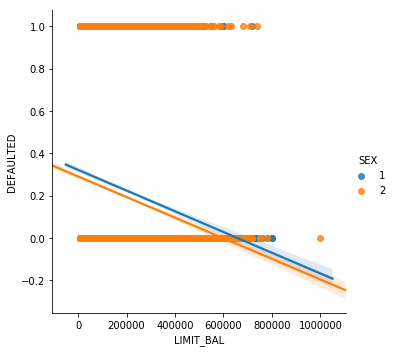

In [96]:
#linear plot of Limit_Bal vs Defaulted

sns.lmplot('LIMIT_BAL', 'DEFAULTED', data=cc, hue = 'SEX')

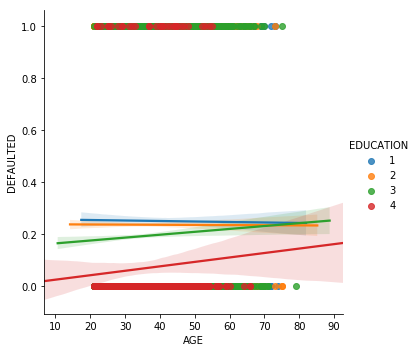

In [97]:
#linear plot of age/education vs Defaulted

sns.lmplot('AGE', 'DEFAULTED', data=cc, hue = 'EDUCATION')

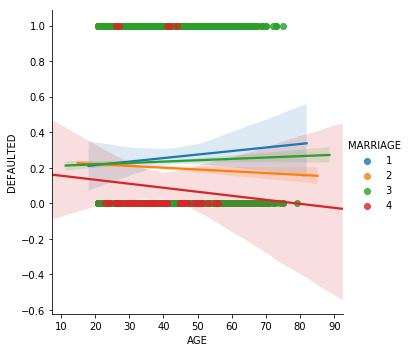

In [98]:
#linear plot of age/marriage vs Defaulted

sns.lmplot('AGE', 'DEFAULTED', data=cc, hue = 'MARRIAGE')

In [3]:
#Define feature and dependent variable
#selct correct dataset and number of attributes
cc_features = ccHIDEF1.iloc[:, 0:23]
depVar = ccHIDEF1['DEFAULTED']

In [4]:
cc_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 23 columns):
LIMIT_BAL        1202 non-null int64
SEX              1202 non-null int64
EDUCATION        1202 non-null int64
MARRIAGE         1202 non-null int64
AGE              1202 non-null int64
SEPT_STATUS      1202 non-null int64
AUGUST_STATUS    1202 non-null int64
JULY_STATUS      1202 non-null int64
JUNE_STATUS      1202 non-null int64
MAY_STATUS       1202 non-null int64
APRILL_STATUS    1202 non-null int64
SEPT_BILL        1202 non-null int64
AUGUST_BILL      1202 non-null int64
JULY_BILL        1202 non-null int64
JUNE_BILL        1202 non-null int64
MAY_BILL         1202 non-null int64
APRIL_BILL       1202 non-null int64
SEPT_PAID        1202 non-null int64
AUGUST_PAID      1202 non-null int64
JULY_PAID        1202 non-null int64
JUNE_PAID        1202 non-null int64
MAY_PAID         1202 non-null int64
APRIL_PAID       1202 non-null int64
dtypes: int64(23)
memory usage: 216.1 KB


In [56]:
depVar.head()

0    0
1    0
2    0
3    1
4    0
Name: DEFAULTED, dtype: int64

In [5]:
#define X, y and label
#choose correct data set to define 
X = cc_features
y = depVar
#Number of unique y values 
print('Class labels:', np.unique(y))

Class labels: [0 1]


In [6]:
#Create 70/30 X/y train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [59]:
print('Label counts in y_train:', np.bincount(y_train))

Label counts in y_train: [821 119]


In [14]:
X_train.shape, X_test.shape

((841, 23), (361, 23))

In [ ]:
#RFE - Recursive Feature Elimination
# - using DecisionTreeCLassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
modelTree = DecisionTreeClassifier()
#choose number of features eliminated
rfe = RFE(modelTree, 6)
fit = rfe.fit(cc, depVar)

In [ ]:
#Show RFE results and which attributes eliminated
print(rfe.support_)
print(rfe.ranking_)

In [16]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(n_estimators=300, criterion='gini', 
                            max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                            bootstrap=True, oob_score=True, n_jobs=1, random_state=1, 
                            verbose=0, warm_start=False, class_weight=None)
clf.fit(X_train,y_train)

accuracy=clf.score(X_test,y_test)
print("Random Forest",accuracy)

Random Forest 0.703601108033241


In [ ]:
#Classification Metrics

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)

In [18]:
#Prediction Results
y_pred = clf.predict(X_test)
print(y_pred)

#Export to Excel csv
df = pd.DataFrame(y_pred)

df.to_csv('y_pred12.csv')

[0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0]


In [15]:
y_test.to_csv('y_test.csv')

In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10, weights='uniform', 
                           algorithm='auto', leaf_size=30, p=2, 
                           metric='minkowski', metric_params=None, n_jobs=None)
clf.fit(X_train,y_train)

accuracy=clf.score(X_test,y_test)
print('KNN Accuracy',accuracy)

KNN Accuracy 0.6343490304709142


In [99]:
#Tune Model 
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": np.arange(1, 10), "metric": ["euclidean", "cityblock"]}
grid = GridSearchCV(estimator=KNeighborsClassifier,
 param_grid=params)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

c:\users\riley barrow\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


TypeError: get_params() missing 1 required positional argument: 'self'

In [100]:
#Tune Model 
from sklearn.model_selection import RandomizedSearchCV
params = {"n_neighbors": range(1,5), "weights": ["uniform", "distance"]}
rsearch = RandomizedSearchCV(estimator=KNeighborsClassifier,
 param_distributions=params,
 cv=4,
 n_iter=8,
 random_state=5)
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)

TypeError: get_params() missing 1 required positional argument: 'self'

In [ ]:
params = {"n_neighbors": np.arange(1,3), "metric": ["euclidean", "cityblock"]}
grid = GridSearchCV(estimator=knn,
 param_grid=params)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

In [11]:
#Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

clf=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5,2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
       warm_start=False)


clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print("ANN",accuracy)

ANN 0.3407202216066482


In [12]:
#C-Support Vector Classification

import sklearn.svm as svm

clf = svm.LinearSVC(penalty='l2', loss='squared_hinge', 
                    dual=True, tol=0.0001, C=1.0, multi_class='ovr', 
                    fit_intercept=True, intercept_scaling=1, 
                    class_weight=None, verbose=0, random_state=1, max_iter=1000)
                   
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print("Decision Tree Accuracy", accuracy)

Decision Tree Accuracy 0.6509695290858726


c:\users\riley barrow\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
